In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

breast_cancer_df = pd.read_csv('breast-cancer.csv')
covid_df = pd.read_csv('covid.csv')

##### Type of trial: intervention (drug, procedure etc.)

In [26]:
## Function that gets the intervention
def get_interventions(df):
    cleaned_data = []

    # Iterate over each row in the original dataframe
    for index, row in df.iterrows():
        interventions = row['Interventions'].split('|')


        # Iterate over each intervention
        for intervention in interventions:
            type_name = intervention.split(':')
            type = type_name[0].strip()
            name = type_name[1].strip()

            # Append the cleaned data to the new dataframe
            cleaned_data.append({'trial_id': index, 'Type': type, 'Name': name})

    cleaned_df = pd.DataFrame(cleaned_data)

    return cleaned_df

breast_cancer_intervention_df = get_interventions(breast_cancer_df)
covid_intervention_df = get_interventions(covid_df)


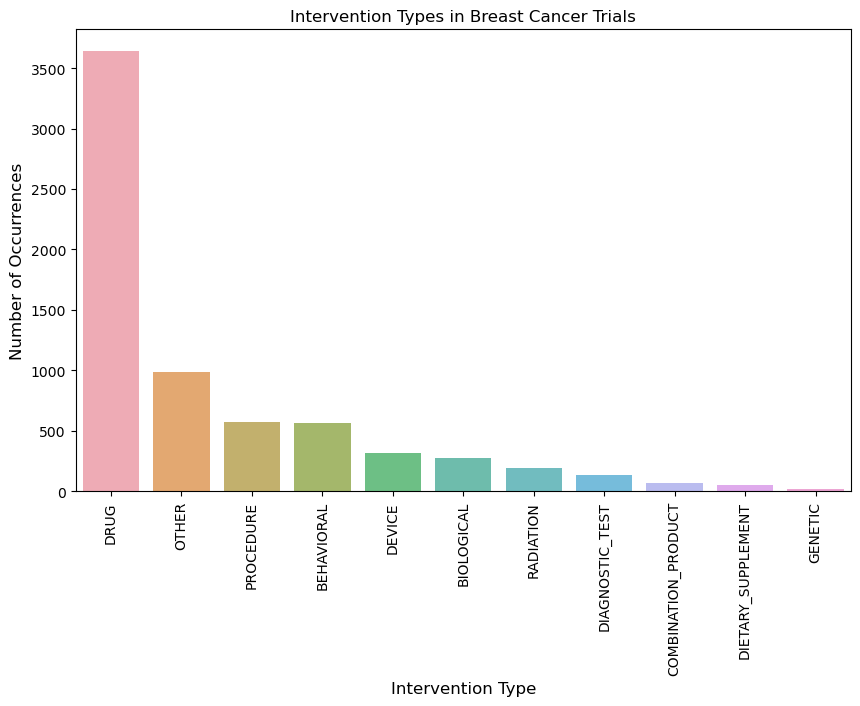

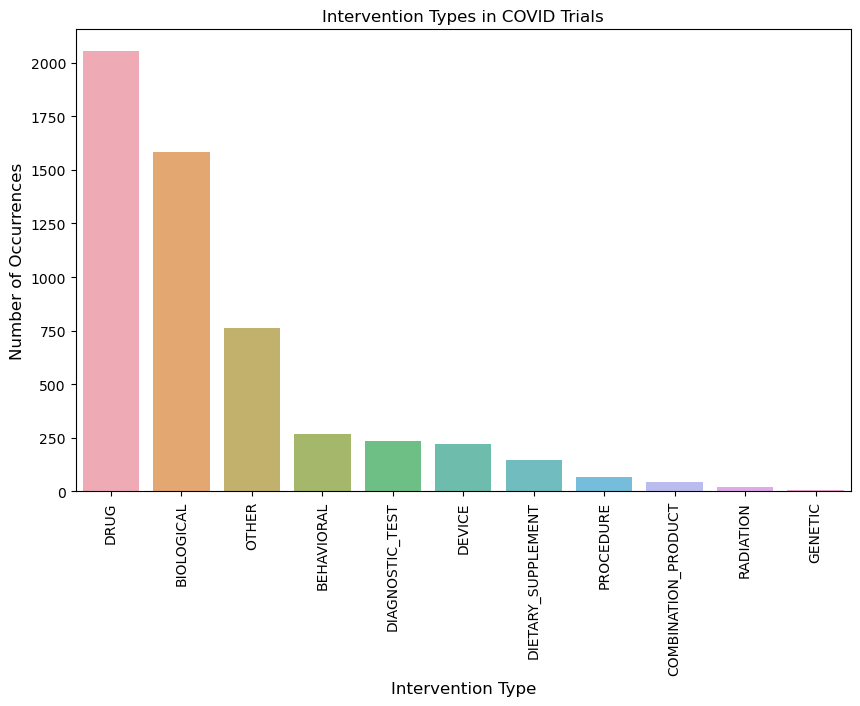

In [27]:
## Bar plot ##

def plot_intervention_types(df, title):
    # Count the frequency of each intervention type
    type_counts = df['Type'].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=type_counts.index, y=type_counts.values, alpha=0.8)

    plt.title(title)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Intervention Type', fontsize=12)

    # Rotate x labels for better visibility
    plt.xticks(rotation=90)

    plt.show()

# Plot intervention types for breast cancer trials
plot_intervention_types(breast_cancer_intervention_df, 'Intervention Types in Breast Cancer Trials')

# Plot intervention types for COVID trials
plot_intervention_types(covid_intervention_df, 'Intervention Types in COVID Trials')

In [ ]:
## Side by Side Bar Plot ##
